## Test 1. My first data science project

### In this lab you will apply the concepts and techniques developed in previous sessions. You are expected to work on the assignments on your own DURING the duration of the lab.

### You are expected to submit the code developed as well as a brief description of your findings and insights.

### This lab represents 30% of the total marking of the module¶

TO DO: Description of the challenge

### Let's load and install some libraries

In [1]:
!pip install py-openaq

In [2]:
import pandas as pd
import seaborn as sns
import openaq
import matplotlib as mpl
import matplotlib.pyplot as plt

### Let's load the dataset

In [3]:
airQualityCities=pd.read_csv('https://raw.githubusercontent.com/thousandoaks/BEMM458_OLD/master/data/airQualityCities.csv')

In [4]:
airQualityCities.sample(10)

,date.local,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
17711,2021-10-01 04:00:00,ES1563A,co,400.0,b'\xc2\xb5g/m\xc2\xb3',ES,Madrid,2021-10-01 02:00:00+00:00,40.479170,-3.377780
15705,2021-10-02 04:00:00,ES0118A,pm10,17.0,b'\xc2\xb5g/m\xc2\xb3',ES,Madrid,2021-10-02 05:00:00+00:00,40.421667,-3.682222
31175,2021-09-29 10:30:00,"Jahangirpuri, Delhi - DPCC",pm25,34.0,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 05:00:00+00:00,28.732820,77.170633
26644,2021-09-29 22:45:00,"DTU, Delhi - CPCB",pm25,58.4,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 17:15:00+00:00,28.750050,77.111261
1921,2021-10-11 04:00:00,FR04004,o3,42.0,b'\xc2\xb5g/m\xc2\xb3',FR,Paris,2021-10-11 02:00:00+00:00,48.891670,2.346669
12740,2021-10-04 04:00:00,ES1564A,no2,18.0,b'\xc2\xb5g/m\xc2\xb3',ES,Madrid,2021-10-04 05:00:00+00:00,40.540560,-3.644720
7597,2021-10-07 22:00:00,FR04012,pm10,50.2,b'\xc2\xb5g/m\xc2\xb3',FR,Paris,2021-10-07 20:00:00+00:00,48.827782,2.327499
24792,2021-09-30 03:45:00,"Chandni Chowk, Delhi - IITM",co,820.0,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 22:15:00+00:00,28.656756,77.227234
29039,2021-09-29 16:45:00,"ITO, Delhi - CPCB",so2,0.0,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 11:15:00+00:00,28.628624,77.241060
35000,2021-09-29 01:15:00,"Ashok Vihar, Delhi - DPCC",co,800.0,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-28 19:45:00+00:00,28.695381,77.181665


In [5]:
airQualityCities.head()

,date.local,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
0,2021-10-12 23:00:00,US Diplomatic Post: New Delhi,pm25,-999.0,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-10-12 17:30:00+00:00,28.635760,77.224450
1,2021-10-12 18:00:00,Southend-on-Sea,pm10,14.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.544206,0.678408
2,2021-10-12 18:00:00,London Eltham,pm25,8.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.452580,0.070766
3,2021-10-12 18:00:00,Tower Hamlets Roadside,no2,36.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.522530,-0.042155
4,2021-10-12 18:00:00,London Eltham,no2,15.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.452580,0.070766


In [6]:
airQualityCities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37087 entries, 0 to 37086
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date.local             37087 non-null  object 
 1   location               37087 non-null  object 
 2   parameter              37087 non-null  object 
 3   value                  37087 non-null  float64
 4   unit                   37087 non-null  object 
 5   country                37087 non-null  object 
 6   city                   37087 non-null  object 
 7   date.utc               37087 non-null  object 
 8   coordinates.latitude   37087 non-null  float64
 9   coordinates.longitude  37087 non-null  float64
dtypes: float64(3), object(7)
memory usage: 2.8+ MB


In [7]:
airQualityCities.groupby('city').count()

,date.local,location,parameter,value,unit,country,date.utc,coordinates.latitude,coordinates.longitude
city,,,,,,,,,
Beijing,300,300,300,300,300,300,300,300,300
Berlin,2248,2248,2248,2248,2248,2248,2248,2248,2248
Delhi,16265,16265,16265,16265,16265,16265,16265,16265,16265
London,5772,5772,5772,5772,5772,5772,5772,5772,5772
Madrid,7400,7400,7400,7400,7400,7400,7400,7400,7400
Paris,5102,5102,5102,5102,5102,5102,5102,5102,5102


In [8]:
airQualityCities.groupby('parameter').count()

,date.local,location,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
parameter,,,,,,,,,
co,3248,3248,3248,3248,3248,3248,3248,3248,3248
no2,10417,10417,10417,10417,10417,10417,10417,10417,10417
o3,7401,7401,7401,7401,7401,7401,7401,7401,7401
pm10,7206,7206,7206,7206,7206,7206,7206,7206,7206
pm25,5783,5783,5783,5783,5783,5783,5783,5783,5783
so2,3032,3032,3032,3032,3032,3032,3032,3032,3032


## Question 1. Find cities with levels of O3 larger than 120 µg/m³ 

In [9]:
airQualityCities.head(30)

,date.local,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
0,2021-10-12 23:00:00,US Diplomatic Post: New Delhi,pm25,-999.0,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-10-12 17:30:00+00:00,28.635760,77.224450
1,2021-10-12 18:00:00,Southend-on-Sea,pm10,14.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.544206,0.678408
2,2021-10-12 18:00:00,London Eltham,pm25,8.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.452580,0.070766
3,2021-10-12 18:00:00,Tower Hamlets Roadside,no2,36.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.522530,-0.042155
4,2021-10-12 18:00:00,London Eltham,no2,15.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.452580,0.070766
5,2021-10-12 18:00:00,London Harlington,pm10,17.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.488790,-0.441614
6,2021-10-12 18:00:00,Southend-on-Sea,no2,15.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.544206,0.678408
7,2021-10-12 18:00:00,Thurrock,no2,24.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.477070,0.317969
8,2021-10-12 18:00:00,London Eltham,pm10,13.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.452580,0.070766
9,2021-10-12 18:00:00,London Harlington,pm25,10.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.488790,-0.441614


In [10]:
filter_o3 = airQualityCities["parameter"]=="o3"

In [11]:
o3_filter = airQualityCities[filter_o3]

In [12]:
highest_o3 = (o3_filter["value"]>120)

In [13]:
o3_highest = o3_filter[highest_o3]

In [14]:
o3_highest

,date.local,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
26683,2021-09-29 22:45:00,"Jahangirpuri, Delhi - DPCC",o3,162.20,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 17:15:00+00:00,28.732820,77.170633
27279,2021-09-29 21:15:00,"Ashok Vihar, Delhi - DPCC",o3,125.70,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 15:45:00+00:00,28.695381,77.181665
28675,2021-09-29 17:45:00,"DTU, Delhi - CPCB",o3,263.70,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 12:15:00+00:00,28.750050,77.111261
28868,2021-09-29 17:15:00,"DTU, Delhi - CPCB",o3,147.20,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 11:45:00+00:00,28.750050,77.111261
29656,2021-09-29 15:15:00,"Aya Nagar, Delhi - IMD",o3,272.67,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 09:45:00+00:00,28.470691,77.109936
29718,2021-09-29 14:45:00,"Chandni Chowk, Delhi - IITM",o3,295.15,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 09:15:00+00:00,28.656756,77.227234
29733,2021-09-29 14:45:00,"Aya Nagar, Delhi - IMD",o3,278.88,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 09:15:00+00:00,28.470691,77.109936
30080,2021-09-29 13:45:00,"IHBAS, Dilshad Garden, Delhi - CPCB",o3,148.23,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 08:15:00+00:00,28.681174,77.302523
36164,2021-09-28 22:15:00,"Ashok Vihar, Delhi - DPCC",o3,205.50,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-28 16:45:00+00:00,28.695381,77.181665
36327,2021-09-28 22:00:00,"North Campus, DU, Delhi - IMD",o3,121.33,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-28 16:30:00+00:00,28.657381,77.158545


## Question 2. Which city has the cleanest air ?
### Tip: consider adapting the following example: https://seaborn.pydata.org/examples/grouped_boxplot.html

In [15]:
city_grouped1 = airQualityCities.groupby(["city", "parameter"]).mean()

In [63]:
city_grouped1.head(30)

value  coordinates.latitude  coordinates.longitude
city    parameter                                                         
Beijing pm25      -780.380000             39.950000             116.470000
Berlin  co         267.555556             52.488841              13.394091
        no2         16.033369             52.500840              13.401215
        o3          14.868796             48.746240             -25.479339
        pm10        18.440835             52.497737              13.414482
        pm25        12.687855             52.497792              13.414072
Delhi   co         984.832721             28.638424              77.174271
        no2         21.598024             28.638620              77.177797
        o3          24.051291             28.638154              77.176585
        pm10        88.123526             28.639336              77.175901
        pm25        21.445833             28.640278              77.183718
        so2          8.670405             28.644236              77.182874
London  no2         18.745915             51.512273               0.093549
        o3          36.179387             51.512680               0.117678
        pm10        12.079461             51.494645               0.188329
        pm25         7.069494             51.501662               0.136565
        so2          1.596386             51.477070               0.317969
Madrid  co         360.816327             40.474462              -3.667983
        no2         23.337947             40.418497              -3.683917
        o3          44.216649             40.415188              -3.687000
        pm10        14.466007             40.425004              -3.691209
        pm25         8.878225             40.426026              -3.666303
        so2          2.397490             40.473558              -3.695057
Paris   no2         34.055988             48.853514               2.346849
        o3          41.492475             48.860773               2.353337
        pm10        21.637607             48.859677               2.335382
        pm25        12.278495             48.838603               2.412785

In [17]:
Beijing_location = airQualityCities[(airQualityCities["city"]=="Beijing")]

In [18]:
Beijing_location_pm25 =Beijing_location[(Beijing_location["parameter"]=="pm25")]

In [19]:
Berlin_location = airQualityCities[(airQualityCities["city"]=="Berlin")]

In [20]:
Berlin_location_pm25 = Berlin_location[(Berlin_location["parameter"]=="pm25")]

In [21]:
Delhi_location = airQualityCities[(airQualityCities["city"]=="Delhi")]

In [22]:
Delhi_location_pm25 = Delhi_location[(Delhi_location["parameter"]=="pm25")]

In [23]:
Madrid_location = airQualityCities[(airQualityCities["city"]=="Madrid")]

In [24]:
Madrid_location_pm25 = Madrid_location[(Madrid_location["parameter"]=="pm25")]

In [25]:
Paris_location = airQualityCities[(airQualityCities["city"]=="Paris")]

In [26]:
Paris_location_pm25 = Paris_location[(Paris_location["parameter"]=="pm25")]

In [27]:
london_location = airQualityCities[(airQualityCities["city"]=="London")]

In [28]:
london_location_pm25 = london_location[(london_location["parameter"]=="pm25")]

In [29]:
all_cities_pm25 =Beijing_location_pm25.append(Berlin_location_pm25)

In [30]:
all_cities_pm25= all_cities_pm25.append(Delhi_location_pm25)

In [31]:
all_cities_pm25 = all_cities_pm25.append(Madrid_location_pm25)

In [32]:
all_cities_pm25 = all_cities_pm25.append(Paris_location_pm25)

In [33]:
all_cities_pm25 = all_cities_pm25.append(london_location_pm25)

In [34]:
all_cities_pm25

,date.local,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
17,2021-10-13 01:00:00,Beijing US Embassy,pm25,33.0,b'\xc2\xb5g/m\xc2\xb3',CN,Beijing,2021-10-12 17:00:00+00:00,39.950000,116.470000
40,2021-10-13 00:00:00,Beijing US Embassy,pm25,32.0,b'\xc2\xb5g/m\xc2\xb3',CN,Beijing,2021-10-12 16:00:00+00:00,39.950000,116.470000
62,2021-10-12 23:00:00,Beijing US Embassy,pm25,30.0,b'\xc2\xb5g/m\xc2\xb3',CN,Beijing,2021-10-12 15:00:00+00:00,39.950000,116.470000
82,2021-10-12 22:00:00,Beijing US Embassy,pm25,33.0,b'\xc2\xb5g/m\xc2\xb3',CN,Beijing,2021-10-12 14:00:00+00:00,39.950000,116.470000
109,2021-10-12 21:00:00,Beijing US Embassy,pm25,32.0,b'\xc2\xb5g/m\xc2\xb3',CN,Beijing,2021-10-12 13:00:00+00:00,39.950000,116.470000
...,...,...,...,...,...,...,...,...,...,...
36103,2021-09-28 18:00:00,London Eltham,pm25,3.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-09-28 17:00:00+00:00,51.452580,0.070766
36468,2021-09-28 17:00:00,Southend-on-Sea,pm25,4.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-09-28 16:00:00+00:00,51.544206,0.678408
36594,2021-09-28 17:00:00,London Eltham,pm25,3.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-09-28 16:00:00+00:00,51.452580,0.070766
36873,2021-09-28 16:00:00,Southend-on-Sea,pm25,4.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-09-28 15:00:00+00:00,51.544206,0.678408


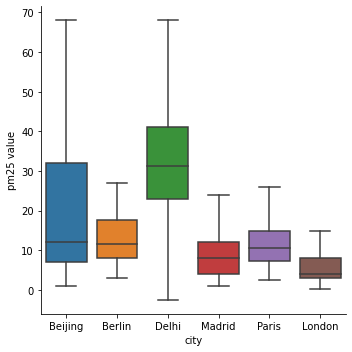

In [55]:
a = sns.catplot(
            x="city",
            y="value",
            data=all_cities_pm25,
            kind="box",
            sym="")
a.set(ylabel="pm25 value")

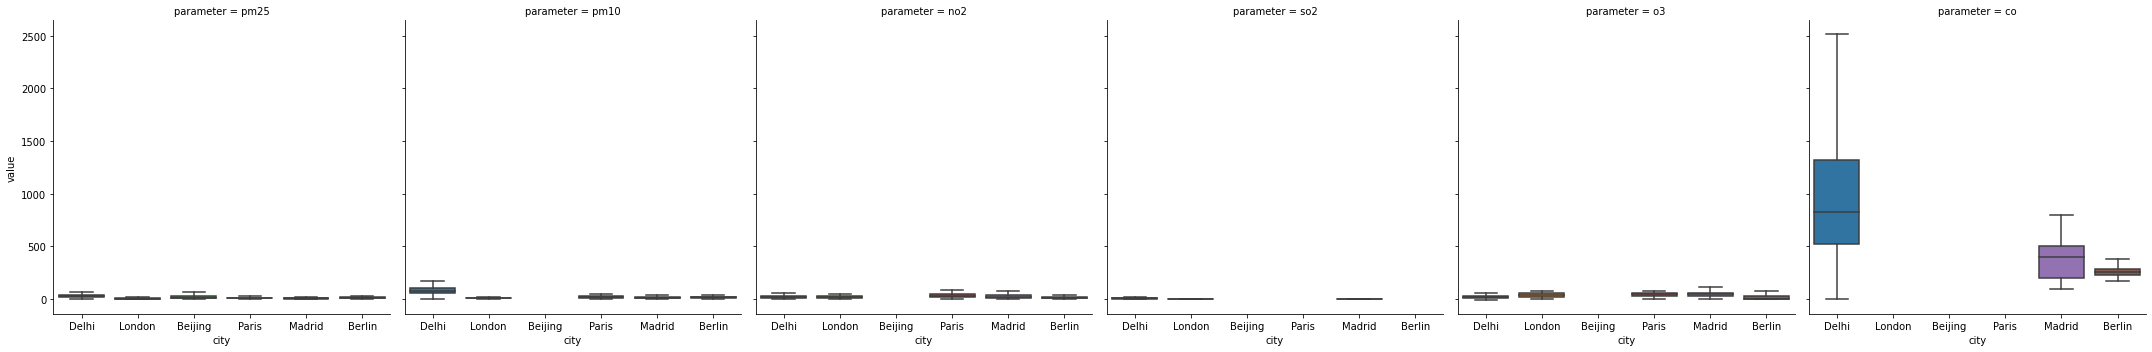

In [68]:
sns.catplot(
            x="city",
            y="value",
            data=airQualityCities,
            kind="box",
            sym="",
            col="parameter")

In [ ]:
## London has cleanest air between these cities.

## Question 3. Which location is the most poluted in London ?

In [37]:
london_location = airQualityCities[(airQualityCities["city"]=="London")]

In [38]:
london_location_pm25 = london_location[(london_location["parameter"]=="pm25")]

In [39]:
london_location_pm25

,date.local,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
2,2021-10-12 18:00:00,London Eltham,pm25,8.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.452580,0.070766
9,2021-10-12 18:00:00,London Harlington,pm25,10.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.488790,-0.441614
12,2021-10-12 18:00:00,Southend-on-Sea,pm25,9.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.544206,0.678408
23,2021-10-12 17:00:00,London Eltham,pm25,8.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 16:00:00+00:00,51.452580,0.070766
30,2021-10-12 17:00:00,London Harlington,pm25,10.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 16:00:00+00:00,51.488790,-0.441614
...,...,...,...,...,...,...,...,...,...,...
36103,2021-09-28 18:00:00,London Eltham,pm25,3.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-09-28 17:00:00+00:00,51.452580,0.070766
36468,2021-09-28 17:00:00,Southend-on-Sea,pm25,4.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-09-28 16:00:00+00:00,51.544206,0.678408
36594,2021-09-28 17:00:00,London Eltham,pm25,3.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-09-28 16:00:00+00:00,51.452580,0.070766
36873,2021-09-28 16:00:00,Southend-on-Sea,pm25,4.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-09-28 15:00:00+00:00,51.544206,0.678408


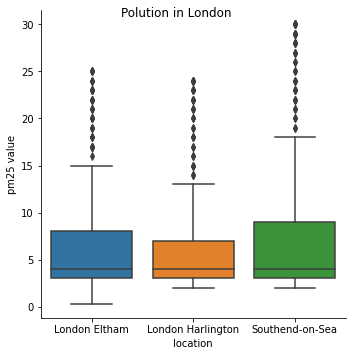

In [40]:
g = sns.catplot(
            x="location",
            y="value",
            data=london_location_pm25,
            kind="box")
g.fig.suptitle("Polution in London")

g.set(ylabel="pm25 value")


([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

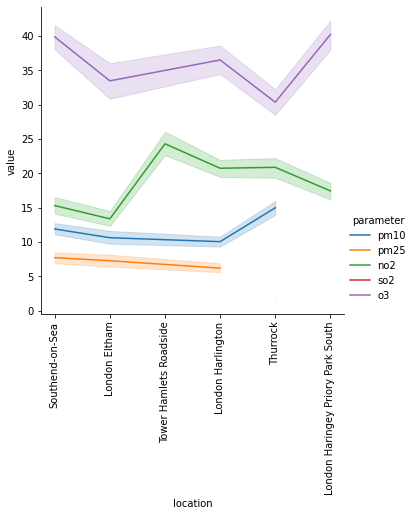

In [66]:
sns.relplot(
            x="location",
            y="value",
            data=london_location,
            kind="line",
            hue="parameter")
plt.xticks(rotation=90)

In [ ]:
### as we can see from the graphes most poluted location in London is Southend-on-Sea

## Question 4. Plot the evolution of air polution accross time in locations in London
### Tip: Consider using Relplot: https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot

In [57]:
london_location_pm25

,date.local,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
2,2021-10-12 18:00:00,London Eltham,pm25,8.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.452580,0.070766
9,2021-10-12 18:00:00,London Harlington,pm25,10.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.488790,-0.441614
12,2021-10-12 18:00:00,Southend-on-Sea,pm25,9.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.544206,0.678408
23,2021-10-12 17:00:00,London Eltham,pm25,8.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 16:00:00+00:00,51.452580,0.070766
30,2021-10-12 17:00:00,London Harlington,pm25,10.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 16:00:00+00:00,51.488790,-0.441614
...,...,...,...,...,...,...,...,...,...,...
36103,2021-09-28 18:00:00,London Eltham,pm25,3.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-09-28 17:00:00+00:00,51.452580,0.070766
36468,2021-09-28 17:00:00,Southend-on-Sea,pm25,4.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-09-28 16:00:00+00:00,51.544206,0.678408
36594,2021-09-28 17:00:00,London Eltham,pm25,3.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-09-28 16:00:00+00:00,51.452580,0.070766
36873,2021-09-28 16:00:00,Southend-on-Sea,pm25,4.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-09-28 15:00:00+00:00,51.544206,0.678408


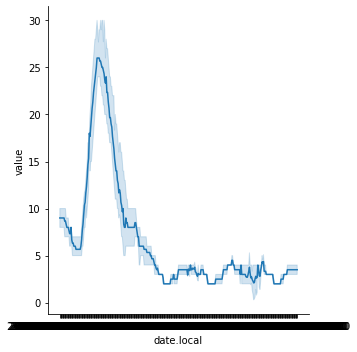

In [56]:
g = sns.relplot(x="date.local",
                y="value",
                data=london_location_pm25,
                kind="line",
                )

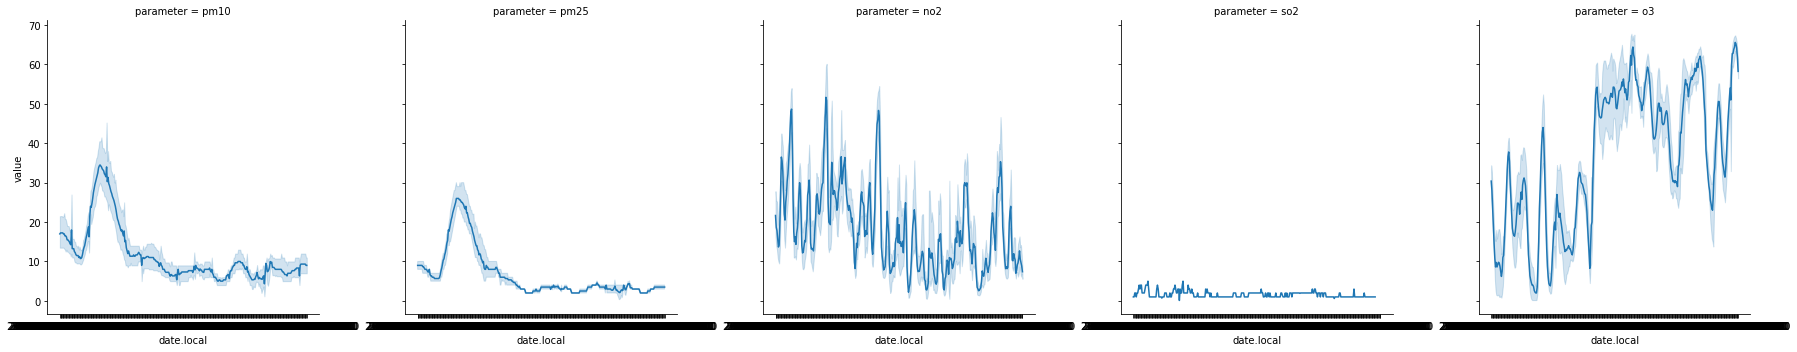

In [69]:
g = sns.relplot(x="date.local",
                y="value",
                data=london_location,
                kind="line",
                col="parameter"
                )

## Question 5: Is there any relationship between levels of PM25 and PM10 in London?

In [43]:
### response: they are strongly correlated

In [44]:
london_location_pm10 = london_location[(london_location["parameter"]=="pm10")]

In [45]:
london_location_pm10

,date.local,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
1,2021-10-12 18:00:00,Southend-on-Sea,pm10,14.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.544206,0.678408
5,2021-10-12 18:00:00,London Harlington,pm10,17.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.488790,-0.441614
8,2021-10-12 18:00:00,London Eltham,pm10,13.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.452580,0.070766
11,2021-10-12 18:00:00,Thurrock,pm10,24.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.477070,0.317969
25,2021-10-12 17:00:00,London Eltham,pm10,13.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 16:00:00+00:00,51.452580,0.070766
...,...,...,...,...,...,...,...,...,...,...
36469,2021-09-28 17:00:00,Southend-on-Sea,pm10,9.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-09-28 16:00:00+00:00,51.544206,0.678408
36591,2021-09-28 17:00:00,London Eltham,pm10,7.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-09-28 16:00:00+00:00,51.452580,0.070766
36900,2021-09-28 16:00:00,Southend-on-Sea,pm10,9.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-09-28 15:00:00+00:00,51.544206,0.678408
36965,2021-09-28 16:00:00,Thurrock,pm10,11.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-09-28 15:00:00+00:00,51.477070,0.317969


In [46]:
london_mix = london_location_pm10.append(london_location_pm25)

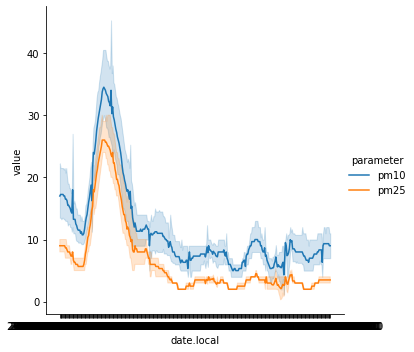

In [47]:
g = sns.relplot(x="date.local",
                y="value",
                data=london_mix,
                kind="line",
                hue="parameter"
                )


In [70]:
### They are strongly coralated,which even from line graph it can be observed. Both lines literelly follows each other within the time.